In [1]:
################################################################################
# CS 224W (Fall 2017) - HW1
# Starter code for Problem 3.3
# Author: anunay@stanford.edu, tonyekim@stanford.edu
# Last Updated: Oct 7, 2017
################################################################################

import snap
import sys
import math
import random
import matplotlib.pyplot as plt

In [2]:
# Setup
hT = 10
b = 2
k = 5   

In [3]:
def sampleNodes():
  """
  return type: [[int, int]]
  return: An array of pairs of nodes
  """
  ret = []
  
  i = 0
  while (i < 1000):
    v = random.randint(0, (b ** hT)-1)
    w = random.randint(0, (b ** hT)-1)
    if (v != w):
      ret.append([v,w])
      i += 1
  
  return ret

In [4]:
def h(v, w):
  """
  :param - v: node id
  :param - w: node id

  return type: int
  return: h(v, w)
  """
  if (v == w):
    return 0
  else:
    xor = bin(v ^ w)[2:]
    xor = ("0" * (hT - len(xor))) + xor
    return hT - xor.find('1')

In [33]:
def search(Graph, s, t):
  """
  :param - s: node id
  :param - t: node id

  return type: Boolean, Int
  return: After performing the search, return either (True, <distance>) if a 
  path is found or (False, -1) otherwise.
  """
  
  ############################################################################
  # TODO: Your code here!
  distance = 0
  while True:
        dist = h(s,t)
        node = Graph.GetNI(s)
        distance += 1
        u, newDist = min([(node.GetOutNId(i), h(node.GetOutNId(i), t))
                          for i in xrange(node.GetOutDeg())],
                         key=lambda x: x[1])
        if u == t:
            return (True, distance)
        if dist <= newDist:
            break
        dist = newDist
        s = u
  ############################################################################
  
  return False, -1

In [34]:
def edgeProbability(alpha, v, w):
  """
  :param - alpha: given parameter [refer to 3.3]
  :param - v: node id
  :param - w: node id

  return type: Int
  return: p_v(w) [refer to 3.2]
  """
  return (b ** (-(alpha * h(v,w))))

In [35]:
 def Z(alpha):
  """
  :param - alpha: given parameter [refer to 3.3]

  return type: Float
  return: Normalizing constant [refer to 3.2]
  """
  z = 0.0
  for i in range(1, hT+1):
    z += (pow(b, i) - pow(b, i-1)) * pow(b, -i * alpha);
  return z

In [36]:
from collections import defaultdict
import numpy as np

In [44]:
def createEdges(Graph, alpha):
  """
  :param - Graph: snap.TNGraph object representing a directed graph
  :param - alpha: given parameter [refer to 3.3]

  return type: snap.TNGraph
  return: A directed graph with edges constructed according to description
  [refer to 3.2]
  """
  
  ############################################################################
  # TODO: Your code here! (Hint: use Graph.AddEdge() to add edges)
  # Map from node to probabilties fo all other nodes. We assume the nodes
  # are numbered sequentially.
  constant = Z(alpha)
  probabilities = {}
  N = Graph.GetNodes()
  for i in xrange(N):
    probabilities[i] = np.zeros(N, dtype=float)
    for j in xrange(N):
        if i != j:
            probabilities[i][j] = edgeProbability(alpha, i, j)
    probabilities[i] /= float(constant)
    assert sum(probabilities[i])- 1 < 1e-4
    
  for i in xrange(N):
    sources = np.random.choice(N, size=k, replace=False,
                               p=probabilities[i])
    assert len(sources) == k
    for source in sources:
        Graph.AddEdge(i, source)
  assert Graph.GetEdges() == Graph.GetNodes() * k
  for node in Graph.Nodes():
        assert node.GetOutDeg() == k
  ############################################################################
  
  return Graph

0.1 1.75 0.008
0.2 2.11111111111 0.009
0.3 2.1 0.02
0.4 1.95238095238 0.021
0.5 2.36 0.025
0.6 2.85714285714 0.035
0.7 2.30303030303 0.033
0.8 2.72222222222 0.036
0.9 2.59375 0.032
1.0 2.9756097561 0.041
1.1 2.97959183673 0.049
1.2 2.71875 0.032
1.3 3.05263157895 0.038
1.4 2.93333333333 0.03
1.5 2.48484848485 0.033
1.6 2.56 0.025
1.7 2.5652173913 0.023
1.8 2.5625 0.016
1.9 2.30769230769 0.026
2.0 3.0 0.016
2.1 2.5 0.01
2.2 2.125 0.016
2.3 2.0 0.018
2.4 1.5 0.006
2.5 2.36363636364 0.011
2.6 1.90909090909 0.011
2.7 1.83333333333 0.012
2.8 1.625 0.008
2.9 1.75 0.016
3.0 1.45454545455 0.011
3.1 1.61538461538 0.013
3.2 1.8 0.01
3.3 1.63636363636 0.011
3.4 1.25 0.008
3.5 1.64285714286 0.014
3.6 1.5 0.006
3.7 1.375 0.008
3.8 1.69230769231 0.013
3.9 1.875 0.008
4.0 1.5 0.01
4.1 1.42857142857 0.007
4.2 1.61538461538 0.013
4.3 1.53846153846 0.013
4.4 1.7 0.01
4.5 1.42857142857 0.007
4.6 1.28571428571 0.007
4.7 1.42857142857 0.007
4.8 1.25 0.004
4.9 1.33333333333 0.012
5.0 1.5 0.012
5.1 1.25 0.00

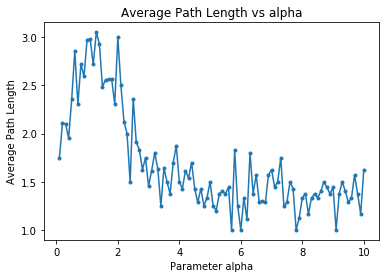

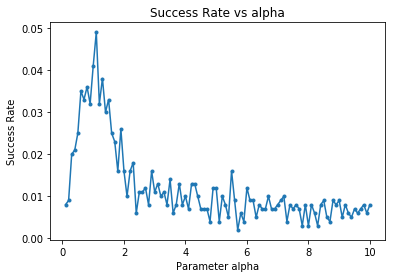

In [45]:
def runExperiment(alpha):
  """
  :param - alpha: given parameter [refer to 3.3]

  return type: [float, float]
  return: [average path length, success probability]
  """
  
  Graph = snap.TNGraph.New()
  for i in range(0, b ** 10):
    Graph.AddNode(i)
    
  Graph = createEdges(Graph, alpha)
  nodes = sampleNodes()
    
  c_success = 0.0
  c_path = 0.0
    
  for i in range(0, 1000):
    found, path = search(Graph, nodes[i][0], nodes[i][1])
    if found:
      c_success += 1
      c_path += path
    
  p_success = c_success/1000.0
  a_path = -1
  
  if c_success != 0:
    a_path = c_path/c_success
    
  return [a_path, p_success]
    
def main():
  results = []
  alpha = 0.1
 
  while (alpha <= 10):
    results.append([alpha] + runExperiment(alpha))
    alpha += 0.1
    print ' '.join(map(str, results[-1]))
  
  plt.figure(1);
  plt.plot([data[0] for data in results], [data[1] for data in results], marker='o', markersize=3)
  plt.xlabel('Parameter alpha')
  plt.ylabel('Average Path Length')
  plt.title('Average Path Length vs alpha')
  plt.savefig("output/average_path_length_vs_alpha", dpi=600)

  plt.figure(2);
  plt.plot([data[0] for data in results], [data[2] for data in results], marker='o', markersize=3)
  plt.xlabel('Parameter alpha')
  plt.ylabel('Success Rate')
  plt.title('Success Rate vs alpha')
  plt.savefig("output/average_success_vs_alpha", dpi=600)

  plt.show()


if __name__ == "__main__":
    main()